# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 일래스틱 넷 회귀 구현
> 비용 함수에 L1, L2 규칙화 항에 추가하는 방식을 이용해 라소 회귀와 리지 회귀를 결합한 회귀 유형이다.

In [3]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()

x_vals = np.array([[x[0], x[1], x[2]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# 일괄 작업 크기 선언
batch_size = 50

# 플레이스홀더 및 변수 생성
x_data = tf.placeholder(shape=[None,3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 모델 선언
model_output = tf.add(tf.matmul(x_data, A), b)

# 일래스틱 넷의 비용 함수 생성
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)

l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))

e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)

loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

# 최적화 함수 선언
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)

# 모델 학습
loss_vec = []

for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(temp_loss[0])
    
    if (i+1) % 250 == 0:
        print('Step #' + str(i+1) + 'A = '+ str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss) + '\n')

Step #250A = [[0.17495765]
 [0.6750849 ]
 [0.838713  ]] b = [[-0.57810956]]
Loss = [1.634393]

Step #500A = [[0.35186654]
 [0.7315615 ]
 [0.51333004]] b = [[-0.5008334]]
Loss = [0.9851365]

Step #750A = [[0.459583  ]
 [0.6880191 ]
 [0.37839738]] b = [[-0.44613302]]
Loss = [0.86790407]

Step #1000A = [[0.53266424]
 [0.61964184]
 [0.31006095]] b = [[-0.40017408]]
Loss = [0.81497014]



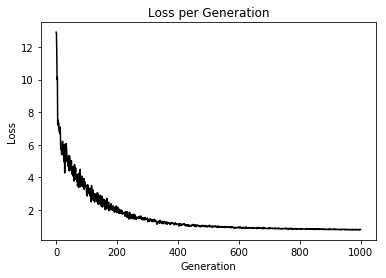

In [4]:
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()